<a href="https://colab.research.google.com/github/rish1789/upgrade_assignment/blob/main/Data_Preprocessing_and_Exploration00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOADING THE DATA**

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

uber_data = pd.read_csv('/content/uber.csv')
uber_data


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


**IDENTITY NULL VALUES** *italicized text*

In [ ]:
#FINDING COLUMNS WITH NULL VALUES
print(uber_data.isnull().sum())


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [ ]:
# FILLING NULL VALUES WITH COLUMN MEDIAN
uber_data['dropoff_latitude'].fillna(uber_data['dropoff_latitude'].median(),inplace=True)
uber_data['dropoff_longitude'].fillna(uber_data['dropoff_longitude'].median(),inplace=True)
uber_data['passenger_count'].fillna(uber_data['passenger_count'].median(),inplace=True)
uber_data['pickup_latitude'].fillna(uber_data['pickup_latitude'].median(),inplace=True)
print(uber_data.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


**OUTLINER TREATMENT**

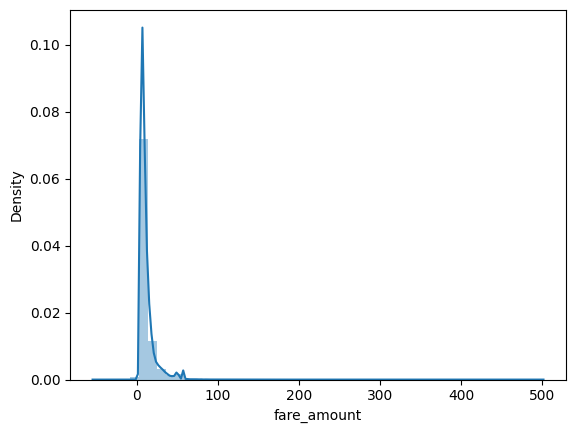

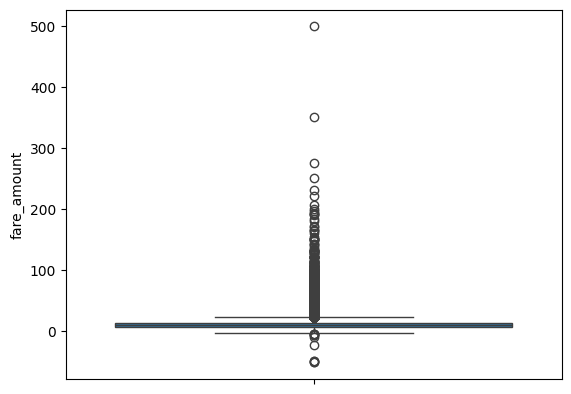

In [ ]:
# DISTRIBUTION ON BIASES OF FARE AMOUNT
sns.distplot(uber_data['fare_amount'])
plt.show()
sns.boxplot(uber_data['fare_amount'])
plt.show()

**DISTRIBUION ON FARE AMOUNT RANGE**

In [ ]:
c1=c2=c3=c4=c5=0  #COUNTER VARIABLES
c6=0
for i in uber_data['fare_amount']:
  if i>0 and i<=100:
    c1 +=1
  elif i<100 and i<=200:
    c6 +=1

  elif i>200 and i<=300:
    c2 +=1
  elif i>300 and i<=400:
    c3 +=1
  elif i>400:
    c4 +=1
  else:
    c5 +=1
print(f'fare amount btw 0 to 100 : {c1}')
print(f'fare amt btw 101 to 200 :{c6}')
print(f'fare amt btw 201 to 300 :{c2}')
print(f'fare amt btw 301 to 400 :{c3}')
print(f'fare amt more than 400 :{c4}')
print(f'fare -ve : {c5}')

fare amount btw 0 to 100 : 199894
fare amt btw 101 to 200 :22
fare amt btw 201 to 300 :5
fare amt btw 301 to 400 :1
fare amt more than 400 :1
fare -ve : 77


**REMOVING THE OUTLINERS**

In [ ]:
uber_data = uber_data[(uber_data['fare_amount'] >0.0) &  (uber_data['fare_amount']<=200.0)]

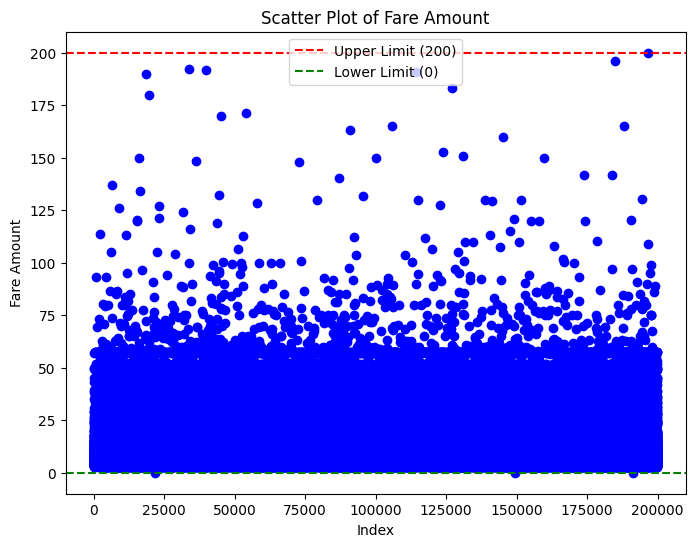

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x=range(len(uber_data)), y=uber_data['fare_amount'], color='blue')
plt.axhline(y=200, color='red', linestyle='--', label='Upper Limit (200)')
plt.axhline(y=0, color='green', linestyle='--', label='Lower Limit (0)')
plt.title('Scatter Plot of Fare Amount')
plt.xlabel('Index')
plt.ylabel('Fare Amount')
plt.legend()
plt.show()

**ADDING THE DISTANCE TRAVEL BY PASSENGER IN DATA**

In [ ]:
# FUNCTION CALCULATE DISTANCE ON BASIS  LONGTITUDE AND LATITUDE OF PICKUP AND DROPFF POINTS
def distance(log_1,lat_1,log_2,lat_2):
  pk_log,pk_lat,df_log,df_lat = map(np.radians,[log_1,lat_1,log_2,lat_2])

  dist_log = pk_log - df_log
  dist_lat = pk_lat - df_lat
  a = np.sin(dist_lat/2)**2 + np.cos(pk_lat) * np.cos(df_lat) * np.sin(dist_log/2)**2
  c = 2 * np.arcsin(np.sqrt(a))
  r = 6371
  return (c*r)

#ADDING NEW COLUMN DISTANCE
uber_data['distance(km)'] = distance(
    uber_data['pickup_longitude'],
    uber_data['pickup_latitude'],
    uber_data['dropoff_longitude'],
    uber_data['dropoff_latitude']
)

uber_data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance(km)
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


**ADDING DISTANCE CATEGORY COLUMN**

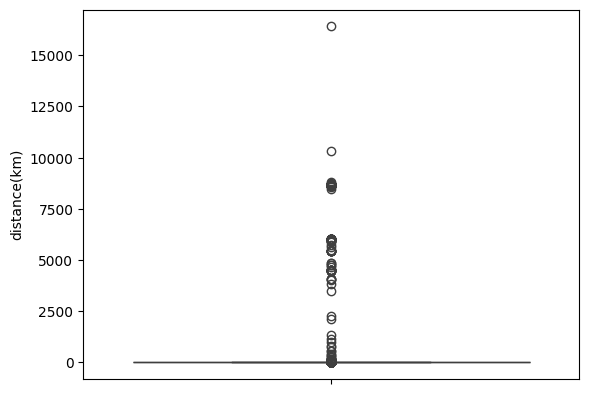

0


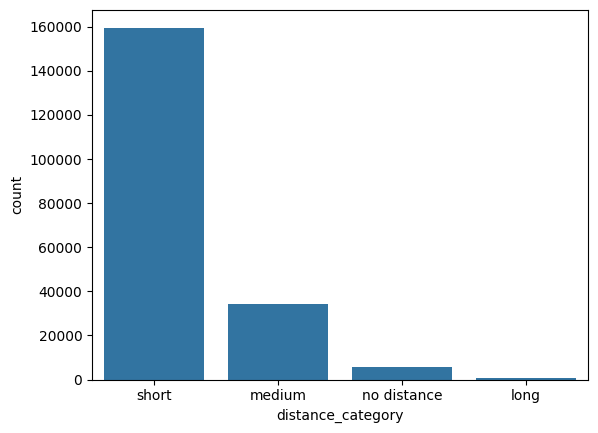

distance_category
short          159576
medium          34234
no distance      5627
long              534
Name: count, dtype: int64


In [ ]:
# PLOT FOR DISTANCE DISTRIBUTION
sns.boxplot(uber_data['distance(km)'])
plt.show()
c1=0
# SORTING THE JOURNEY ON BASIS OF DISTANCE TRAVEL
dist_cat =[]
for i in uber_data['distance(km)']:
  if i>0 and i<=5:
    dist_cat.append('short')
  elif i>5 and i<=30:
    dist_cat.append('medium')
  elif i>30 :
    dist_cat.append('long')

  else:
    dist_cat.append('no distance')

print(c1)
uber_data['distance_category'] = dist_cat
#DISTRIBUTION OF DISTANCE CATEGORY
sns.countplot(x=uber_data['distance_category'])
plt.show()
print(uber_data['distance_category'].value_counts())

**ADDING COLUMN TIME OF DAY**

In [ ]:
#FUNCTION TO SORT TIME
def time_of_day(pktime):
  time = (datetime.strptime(pktime,'%Y-%m-%d %H:%M:%S UTC')).time()
  if time >= datetime.strptime('06:00:00','%H:%M:%S').time() and time < datetime.strptime('12:00:00','%H:%M:%S').time():
    return 'morning'
  elif time >= datetime.strptime('12:00:00','%H:%M:%S').time() and time < datetime.strptime('17:00:00','%H:%M:%S').time():
    return 'afternoon'
  elif time >= datetime.strptime('17:00:00','%H:%M:%S').time() and time < datetime.strptime('21:00:00','%H:%M:%S').time():
    return 'evening'
  else:
    return 'night'
#ADDING COLUMN TIME OF DAY
uber_data['time_of_day'] = uber_data['pickup_datetime'].apply(time_of_day)


time_of_day
night        58021
morning      48143
afternoon    47621
evening      46186
Name: count, dtype: int64



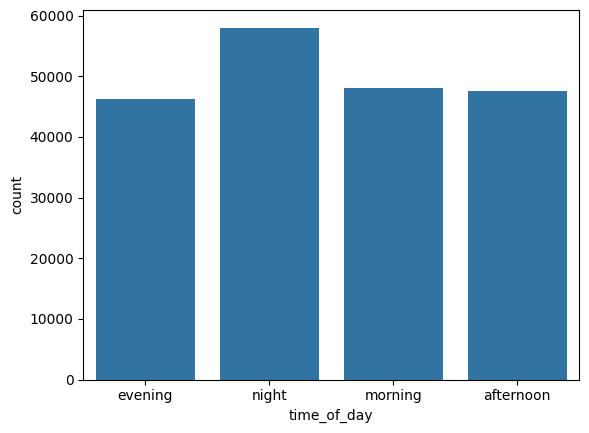

In [ ]:
print(uber_data['time_of_day'].value_counts())
print('')
sns.countplot(x=uber_data['time_of_day'])
plt.show()


**Analyze the categorical data**

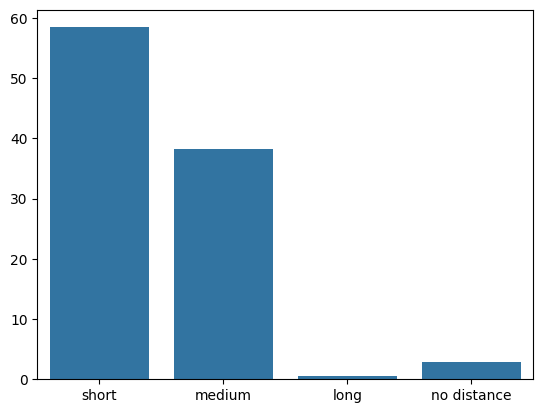

58.42556541163313 38.20714043620069 0.5317684152024981 2.8355257369637


In [ ]:
#ANALYSISING FARE AMOUNT CONTRIBUTION ON BASIS DISTANCE CATEGORY
f=uber_data.fare_amount[uber_data['distance_category']=='short'].sum() # SHORT -TOTAL FARE AMOUNT
m=uber_data.fare_amount[uber_data['distance_category']=='medium'].sum() # MEDIUN - TOTAL FARE AMOUNT
l=uber_data.fare_amount[uber_data['distance_category']=='long'].sum()   # LONG - TOTAL FARE AMOUNT
n=uber_data.fare_amount[uber_data['distance_category']=='no distance'].sum() # NO DISTANCE - FARE AMOUNT
f=f/uber_data.fare_amount.sum()*100
m=m/uber_data.fare_amount.sum()*100
l=l/uber_data.fare_amount.sum()*100
n=n/uber_data.fare_amount.sum()*100
sns.barplot(x=['short','medium','long','no distance'],y=[f,m,l,n])
plt.show()
print(f,m,l,n)


In [ ]:

# REMOVING ROWS WITH NO DITANCE CATEGORY
uber_data = uber_data[(uber_data['distance_category'] != 'no distance') &
                      (uber_data['distance_category'] != 'long')]
uber_data['distance_category'].unique()


array(['short', 'medium'], dtype=object)

SHORT DISTANCE CATEGORY 



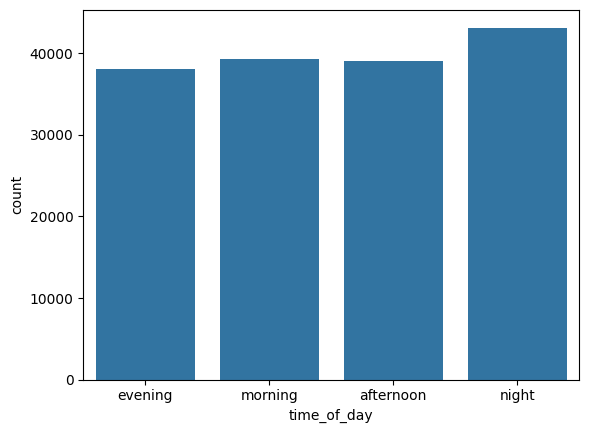

time_of_day
night        43139
morning      39321
afternoon    39035
evening      38081
Name: count, dtype: int64

MEDIUM DISTANCE CATEGORY 



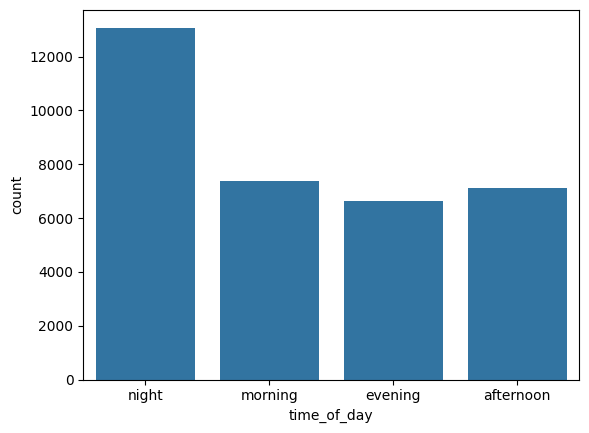

time_of_day
night        13080
morning       7397
afternoon     7122
evening       6635
Name: count, dtype: int64



In [ ]:
short = uber_data[uber_data['distance_category']=='short']
medium = uber_data[uber_data['distance_category']=='medium']

print('short distance category \n'.upper())
sns.countplot(x=short['time_of_day'])
plt.show()
print(f'{short.time_of_day.value_counts()}\n')
print('medium distance category \n'.upper())
sns.countplot(x=medium['time_of_day'])
plt.show()
print(f'{medium.time_of_day.value_counts()}\n')






In [ ]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193810 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         193810 non-null  int64  
 1   key                193810 non-null  object 
 2   fare_amount        193810 non-null  float64
 3   pickup_datetime    193810 non-null  object 
 4   pickup_longitude   193810 non-null  float64
 5   pickup_latitude    193810 non-null  float64
 6   dropoff_longitude  193810 non-null  float64
 7   dropoff_latitude   193810 non-null  float64
 8   passenger_count    193810 non-null  int64  
 9   distance(km)       193810 non-null  float64
 10  distance_category  193810 non-null  object 
 11  time_of_day        193810 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 19.2+ MB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [ ]:
le = LabelEncoder()
uber_data['distance_category_code'] = le.fit_transform(uber_data['distance_category'])
uber_data['time_of_day_encode'] = le.fit_transform(uber_data['time_of_day'])
uber_data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance(km),distance_category,time_of_day,distance_category_code,time_of_day_encode
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,short,evening,1,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,short,evening,1,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,medium,night,0,3
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,short,morning,1,2
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,short,evening,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112210,short,morning,1,2
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875050,short,night,1,3
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.850319,medium,night,0,3
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.539715,short,afternoon,1,0


**SPLITING MODEL INTO TEST AND TRAIN SET**

In [ ]:
model = uber_data.iloc[:,[2,4,5,6,7,8,9,12,13]]
#SPLITING MODEL INTO TEST AND TRAIN SET
x_model = model.iloc[:,1:]
y_model = model.iloc[:,0]



**Correlation Analysis**

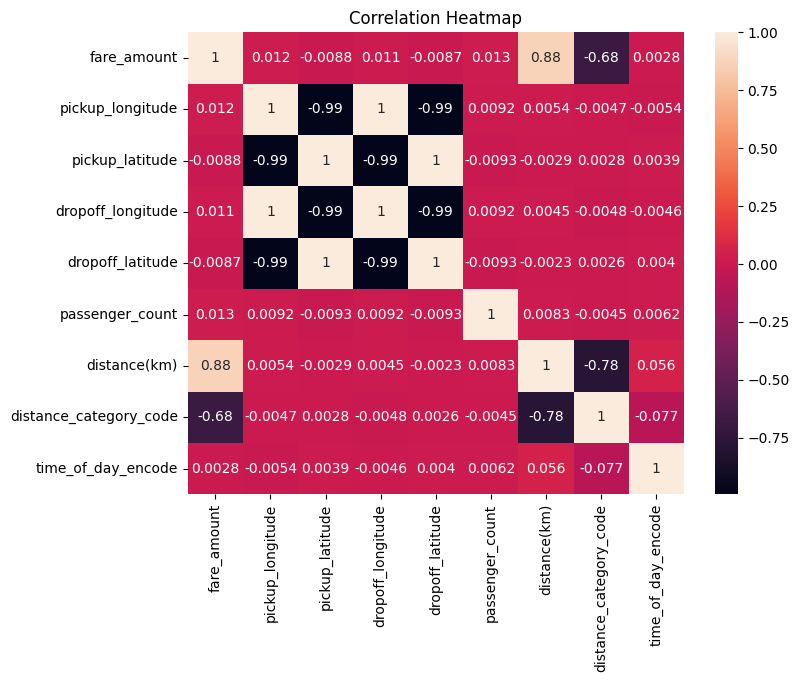

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(model.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#REMOVING pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude COLUMNS FROM THE MODEL
x_model0 = x_model.iloc[:,4:]
#SPLITING MODEL INTO TEST AND TRAIN SET
x_train,x_test,y_train,y_test = train_test_split(x_model0,y_model,train_size=0.7,test_size=0.3,random_state=42)

**TRAINING THE TRAIN DATA AND EVALUATING WITH TEST DATA USING DIFFERENT REGRESSION MODEL ALGORITHM**

In [ ]:
#LINEAR REGRESSION MODEL
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predict on the test set
y_pred = regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Mean Squared Error (MSE): 18.685753662710486
R² Score: 0.7889429167519948
Coefficients: [ 0.03749018  2.32607845 -0.13656698 -0.38934306]
Intercept: 4.220989940248021


In [ ]:
test = np.array(y_test)
for i in range(10):
  per =  abs((test[i] - y_pred[i]) / test[i]) * 100
  print(f'pred = {y_pred[i]}  test = {test[i]} percentage_diff = {per} ')


print(' ')

print(f'test_max= {y_test.max()} prediction_max = {y_pred.max()}')



pred = 5.8775007801108305  test = 4.5 percentage_diff = 30.611128446907344 
pred = 21.68949836456977  test = 20.0 percentage_diff = 8.447491822848843 
pred = 39.36212521604335  test = 35.0 percentage_diff = 12.463214902981008 
pred = 6.219695845486392  test = 8.1 percentage_diff = 23.21363153720504 
pred = 9.368474345978075  test = 9.7 percentage_diff = 3.417790247648699 
pred = 11.414995782218746  test = 8.9 percentage_diff = 28.25837957549152 
pred = 5.958870048225762  test = 3.3 percentage_diff = 80.57181964320492 
pred = 9.540234989521934  test = 8.0 percentage_diff = 19.25293736902418 
pred = 3.2237048729610462  test = 2.5 percentage_diff = 28.94819491844185 
pred = 9.66603692669832  test = 10.5 percentage_diff = 7.942505460016 
 
test_max= 183.0 prediction_max = 73.09429968526356


In [ ]:
# RANDOM FOREST REGRESSION MODEL
rand_forest = RandomForestRegressor(n_estimators=100,random_state=42)
rand_forest.fit(x_train,y_train)
pred_rf = rand_forest.predict(x_test)
mse_rf = mean_squared_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 18.685753662710486
R² Score: 0.7889429167519948


In [ ]:
for i in range(10):
  per =  abs((test[i] - pred_rf[i]) / test[i]) * 100
  print(f'pred = {pred_rf[i]:.2f}  test = {test[i]} percentage_diff = {per:.2f} ')

print(f'\n test_max = {y_test.max()} prediction_max = {pred_rf.max()}')

pred = 5.31  test = 4.5 percentage_diff = 17.98 
pred = 17.53  test = 20.0 percentage_diff = 12.36 
pred = 34.36  test = 35.0 percentage_diff = 1.82 
pred = 8.46  test = 8.1 percentage_diff = 4.41 
pred = 10.20  test = 9.7 percentage_diff = 5.19 
pred = 12.27  test = 8.9 percentage_diff = 37.87 
pred = 5.99  test = 3.3 percentage_diff = 81.64 
pred = 12.36  test = 8.0 percentage_diff = 54.48 
pred = 4.08  test = 2.5 percentage_diff = 63.36 
pred = 8.55  test = 10.5 percentage_diff = 18.60 

 test_max = 183.0 prediction_max = 101.7387


In [ ]:

#XGB REGESSION MODEL
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)
pred_xgb = xgb_model.predict(x_test)
mse_xgb = mean_squared_error(y_test, pred_xgb)
r2_xgb = r2_score(y_test, pred_xgb)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 18.685753662710486
R² Score: 0.7889429167519948


In [ ]:
for i in range(10):
  per =  abs((test[i] - pred_xgb[i]) / test[i]) * 100
  print(f'pred = {pred_xgb[i]:.2f}  test = {test[i]} percentage_diff = {per:.2f} ')

print(f'\n test_max = {y_test.max()} prediction_max = {pred_xgb.max()}')

pred = 5.89  test = 4.5 percentage_diff = 30.88 
pred = 22.08  test = 20.0 percentage_diff = 10.41 
pred = 42.47  test = 35.0 percentage_diff = 21.34 
pred = 6.07  test = 8.1 percentage_diff = 25.01 
pred = 9.52  test = 9.7 percentage_diff = 1.88 
pred = 11.11  test = 8.9 percentage_diff = 24.81 
pred = 5.68  test = 3.3 percentage_diff = 71.97 
pred = 9.81  test = 8.0 percentage_diff = 22.68 
pred = 9.53  test = 2.5 percentage_diff = 281.25 
pred = 9.92  test = 10.5 percentage_diff = 5.52 

 test_max = 183.0 prediction_max = 62.036170959472656


**FINE TUNNING MODEL**

In [ ]:
from sklearn.datasets import make_regression
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# USING RandomizedSearchCV ALGORITHM WITH RANDOM_FOREST_REGRESSION

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rand_forest,
                               param_distributions=param_dist,
                               n_iter=100,
                               cv=3,
                               verbose=2,
                               random_state=42,
                               n_jobs=1)

# Fit the model
rf_random.fit(x_model, y_model)

# Make predictions
predictions = rf_random.predict(x_model)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 3.5min
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 3.6min
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 3.5min
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.0min
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.0min
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.0min
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;

In [ ]:
print(f'Mean Squared Error: {mse}')

# Get the best parameters from the RandomizedSearchCV
best_params = rf_random.best_params_
print(f'Best Hyperparameters: {best_params}')
r21 = r2_score(y_model, predictions)
print(f'R2 Score: {r21}')

Mean Squared Error: 5.128928134486449
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}
R2 Score: 0.9431469014887365


In [ ]:
for i in range(10):
  per1 =  abs((test[i] - predictions[i]) / test[i]) * 100
  print(f'pred = {predictions[i]:.2f}  test = {test[i]} percentage_diff = {per1:.2f} ')

print(f'\n{y_test.max()} {predictions.max()}')


pred = 7.47  test = 4.5 percentage_diff = 66.00 
pred = 8.79  test = 20.0 percentage_diff = 56.06 
pred = 12.90  test = 35.0 percentage_diff = 63.14 
pred = 5.60  test = 8.1 percentage_diff = 30.89 
pred = 14.70  test = 9.7 percentage_diff = 51.51 
pred = 26.74  test = 8.9 percentage_diff = 200.42 
pred = 9.43  test = 3.3 percentage_diff = 185.71 
pred = 13.24  test = 8.0 percentage_diff = 65.55 
pred = 7.13  test = 2.5 percentage_diff = 185.13 
pred = 4.20  test = 10.5 percentage_diff = 60.00 

183.0 120.59915053571427
